In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Question 1

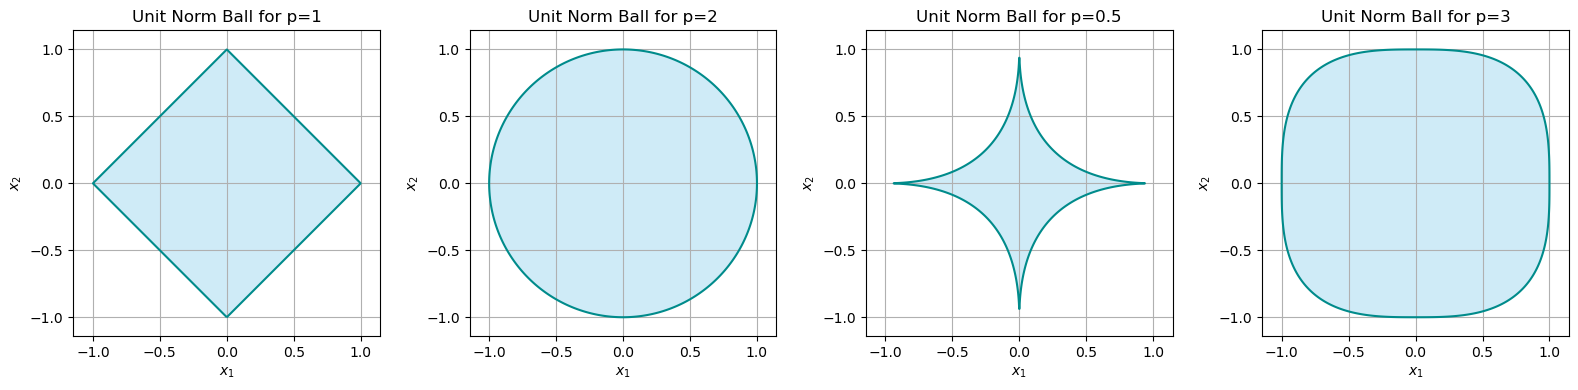

In [3]:
def plot_unit_norm_ball(ax,p, num_points=1000):
    x1 = np.linspace(-1, 1, num_points)
    x2 = np.linspace(-1, 1, num_points)
    X1, X2 = np.meshgrid(x1, x2)

    # Compute the p-norm for each point in the grid
    norm = (np.abs(X1)**p + np.abs(X2)**p)**(1/p)

    # Plot the contour where the p-norm equals 1 (the boundary of the unit ball)
    ax.contourf(X1, X2, norm, levels=[0, 1], colors='skyblue', alpha=0.4)
    ax.contour(X1, X2, norm, levels=[1], colors='darkcyan')
    ax.set_title(f'Unit Norm Ball for p={p}')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.grid(True)
    ax.axis('equal')

fig,ax= plt.subplots(1,4,figsize=(16,4))
plot_unit_norm_ball(ax[0],1)
plot_unit_norm_ball(ax[1],2)
plot_unit_norm_ball(ax[2],0.5)
plot_unit_norm_ball(ax[3],3)
plt.tight_layout()
plt.show()


## Conclusion

- For $ p \geq 1$, the unit norm ball is convex, as evident from the plots.
- For $ 0 < p <1 $, the unit norm ball is non-convex, which is clearly visible from the shape of the plot.


## Question 2

### Demonstrating the Incompleteness of $ C[0, 1] $ with Respect to the $ L_1 $ Norm

To demonstrate that the space $ C[0, 1] $ of continuous functions on the interval $[0, 1]$ is incomplete with respect to the $L_1 $ norm, we can construct a Cauchy sequence of continuous functions that does not converge to a continuous function within $ C[0, 1] $.

#### Overview

The $ L_1 $ norm for functions $f $ and $ g$ in $ C[0, 1]$ is defined as:

$$
\|f - g\|_1 = \int_0^1 |f(x) - g(x)| \, dx
$$

A sequence of functions ${f_n}$ is a Cauchy sequence if for every $\epsilon > 0 $, there exists an integer $ N $ such that for all $m, n \geq N$,

$$
\|f_n - f_m\|_1 < \epsilon
$$

A sequence is convergent if there exists a function \( f \in C[0, 1] \) such that

$$
\|f_n - f\|_1 \to 0 \text{ as } n \to \infty
$$

#### Constructing a Cauchy Sequence

Let's define a sequence of continuous functions ${f_n}$ on $[0, 1]$:

$$
f_n(x) =
\begin{cases}
1 & \text{if } 0 \leq x \leq \frac{1}{2} - \frac{1}{n}, \\
n \left(\frac{1}{2} - x\right) & \text{if } \frac{1}{2} - \frac{1}{n} < x \leq \frac{1}{2}, \\
0 & \text{if } \frac{1}{2} < x \leq 1
\end{cases}
$$

This sequence ${f_n}$ represents continuous functions that resemble increasingly narrow triangles centered at $ x = \frac{1}{2}$.

#### Why It Is Incomplete

- The sequence ${f_n}$ is Cauchy with respect to the $ L_1$ norm.
- As $ n$ increases, $ {f_n}(x) $ converges pointwise to the function $f(x) $ where:

$$
f(x) =
\begin{cases}
1 & \text{if } x = \frac{1}{2}, \\
0 & \text{otherwise}
\end{cases}
$$

- However, $ f(x)$ is **not continuous** on $[0, 1]$. Thus, the sequence ${f_n} $ does not converge to a continuous function in $ C[0,1] $


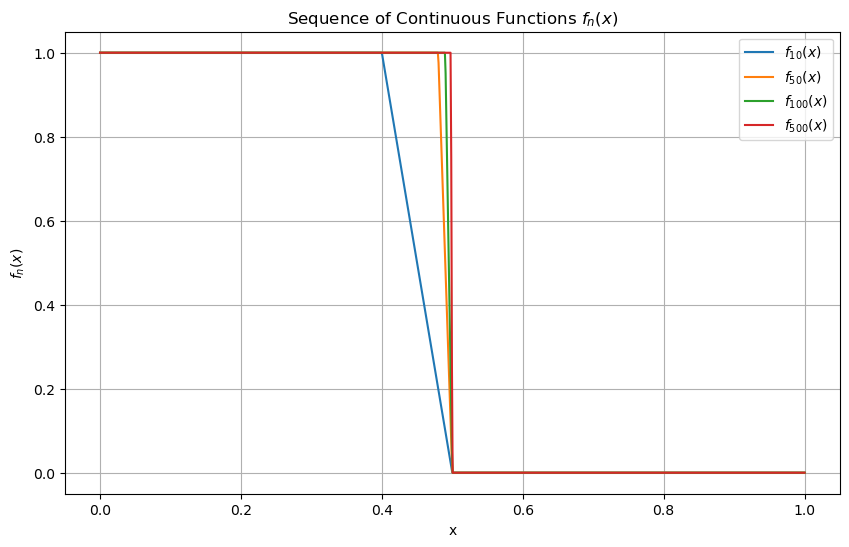

In [7]:
# Define the sequence of functions f_n
def f_n(x, n):
    return np.where(
        x <= 0.5 - 1/n,
        1,
        np.where(
            x <= 0.5,
            n * (0.5 - x),
            0
        )
    )

x_values = np.linspace(0, 1, 1000)

# Define n values to demonstrate the sequence
n_values = [10, 50, 100, 500]

# Plot the functions f_n for different values of n
plt.figure(figsize=(10, 6))

for n in n_values:
    y_values = f_n(x_values, n)
    plt.plot(x_values, y_values, label=f'$f_{{{n}}}(x)$')

plt.title("Sequence of Continuous Functions $f_n(x)$")
plt.xlabel("x")
plt.ylabel("$f_n(x)$")
plt.legend()
plt.grid(True)
plt.show()


## Question 3

In [9]:
def entropy(pmf):

    pmf = np.array(pmf)
    pmf = pmf[pmf > 0]

    entropy_value = -np.sum(pmf * np.log2(pmf))

    return entropy_value


pmf = [0, 0.5, 0.25, 0.25]
print(f"Entropy: {entropy(pmf)} bits")


Entropy: 1.5 bits


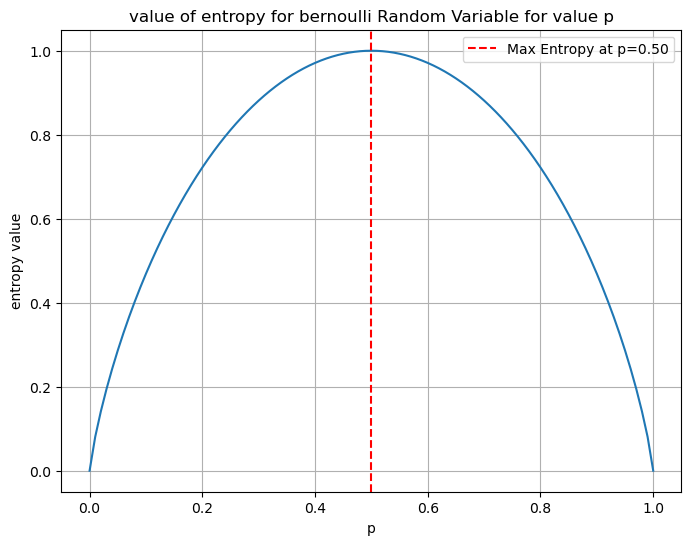

In [10]:
p_val = np.linspace(0,1,101)
values = [entropy([p,1-p]) for p in p_val]
max_entropy = max(zip(values,p_val))
plt.figure(figsize=(8,6))
plt.plot(p_val,values)
plt.grid(True)
plt.xlabel('p')
plt.ylabel('entropy value')
plt.title('value of entropy for bernoulli Random Variable for value p')
plt.axvline(x=max_entropy[1], color='red', linestyle='--', label=f'Max Entropy at p={max_entropy[1]:.2f}')
plt.legend()
plt.show()

## Question 4

**(4)**

$H(X, Y) = -\sum_{x \in X} \sum_{y \in Y} f(X, Y) \log f(X, Y)$

$H(Y|X) = -\sum_{x \in X} \sum_{y \in Y} f(X, Y) \log f(Y|X)$

$
f(Y|X) = \frac{f(X, Y)}{f(X)}
$

$
H(Y|X) = -\sum_{x \in X} \sum_{y \in Y} f(X, Y) (\log f(X, Y) - \log f(X))
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= -\sum_{x \in X} \sum_{y \in Y} f(X, Y) \log f(X, Y) + \sum_{x \in X} \sum_{y \in Y} f(X, Y) \log f(X)
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= H(X, Y) + \left( \sum_{x \in X} f(X) \log f(X) \right)
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= H(X, Y) - H(X)
$

$
\therefore H(Y|X) = H(X, Y) - H(X)
$


## Question 5

**(5)**

$I(X; Y) = \sum_{x \in X} \sum_{y \in Y} P(X, Y) \log \frac{P(X, Y)}{P(X) P(Y)}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= \sum_{x \in X} \sum_{y \in Y} P(X, Y) \log P(X, Y) - \sum_{x \in X} \sum_{y \in Y} P(X, Y) \log (P(X) P(Y))
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= -H(X, Y) - \sum_{x \in X} \sum_{y \in Y} P(X, Y) \log P(X) - \sum_{x \in X} \sum_{y \in Y} P(X, Y) \log P(Y)
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= -H(X, Y) - \sum_{x \in X} P(X) \log P(X) - \sum_{y \in Y} P(Y) \log P(Y)
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= -H(X, Y) + H(X) + H(Y)
$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= H(Y) - H(Y|X)
$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= H(X) - H(X|Y)
$

$
\therefore I(X; Y) = H(Y) - H(Y|X) = H(X) - H(X|Y)
$


## Question 6

**(6)**

$P(X=0, Y=0) = P(X=0, Y=1) = P(X=1, Y=1) = \frac{1}{3}$

$P(X=1, Y=0) = 0$

$P(X=0) = P(X=0, Y=0) + P(X=0, Y=1) = \frac{2}{3}$

$P(X=1) = P(X=1, Y=0) + P(X=1, Y=1) = \frac{1}{3}$

$P(Y=0) = P(X=0, Y=0) + P(X=1, Y=0) = \frac{1}{3}$

$P(Y=1) = P(X=0, Y=1) + P(X=1, Y=1) = \frac{2}{3}$

---
**a)**

$
H(X) = -\left( P(X=0) \log P(X=0) + P(X=1) \log P(X=1) \right)
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= -\left( \frac{2}{3} \log \frac{2}{3} + \frac{1}{3} \log \frac{1}{3} \right)
$

$
H(Y) = -\left( P(Y=0) \log P(Y=0) + P(Y=1) \log P(Y=1) \right)
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= -\left( \frac{1}{3} \log \frac{1}{3} + \frac{2}{3} \log \frac{2}{3} \right)
$

---

**c)**

$
H(X, Y) = -3 \left( \frac{1}{3} \log \frac{1}{3} \right) = -\log \frac{1}{3}
$

---
**b)**

$
H(X|Y) = H(X, Y) - H(Y)
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= -\log \frac{1}{3} + \frac{2}{3} \log \frac{2}{3} + \frac{1}{3} \log \frac{1}{3}
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= \frac{2}{3} \left( \log \frac{2}{3} - \log \frac{1}{3} \right)
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
 = \frac{2}{3} \log 2
$


$H(Y|X) = H(X, Y) - H(X)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
 =-\left( \frac{1}{3} \log \frac{1}{3} + \frac{1}{3} \log \frac{1}{3} + \frac{2}{3} \log \frac{2}{3} \right)
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= \frac{2}{3} \left( \log \frac{2}{3} - \log \frac{1}{3} \right)
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$= \frac{2}{3} \log 2
$

---
**d)**

$
H(Y) - H(Y|X)
$
$
= H(Y) - (H(X, Y) - H(X))
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= H(Y) + H(X) - H(X, Y)
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= -\left( \frac{2}{3} \log \frac{2}{3} + \frac{1}{3} \log \frac{1}{3} \right) - \left( \frac{2}{3} \log \frac{2}{3} + \frac{1}{3} \log \frac{1}{3} \right) + \log \frac{1}{3}
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= \frac{1}{3} \log \frac{1}{3} - \frac{4}{3} \log \frac{2}{3}
$

---
**e)**
$
I(X;Y) = H(Y) - H(Y|X)
$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$
= \frac{1}{3} \log \frac{1}{3} - \frac{4}{3} \log \frac{2}{3}
$


## Question 7

In [18]:
def compute_normalized_histogram(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    hist = hist / np.sum(hist)
    return hist


In [19]:
def plot_img(image_path):

    image = np.asarray(Image.open(image_path)) # Convert to grayscale

    # Compute the normalized histogram
    normalized_hist = compute_normalized_histogram(image)

    # Compute the entropy of the image
    img_entropy = entropy(normalized_hist)

    print(f'Image Entropy: {img_entropy}')
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(image)

    plt.subplot(1,2,2)
    plt.bar(range(256), normalized_hist, color='black', edgecolor='black')
    plt.title('Normalized Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Probability')
    plt.tight_layout()
    plt.show()


Image Entropy: 6.7093123359666365


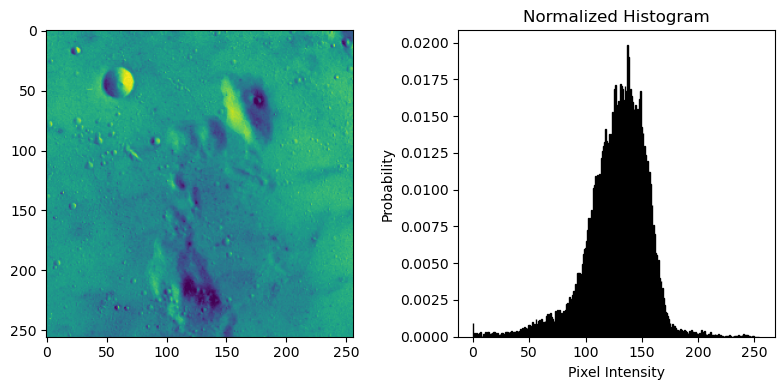

Image Entropy: 6.452275232463875


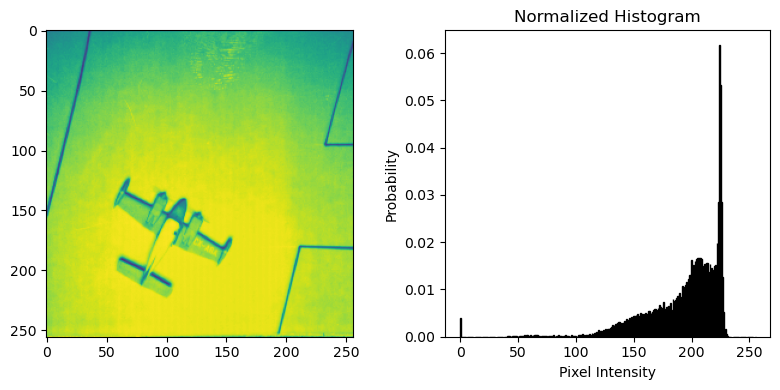

Image Entropy: 6.705667200666732


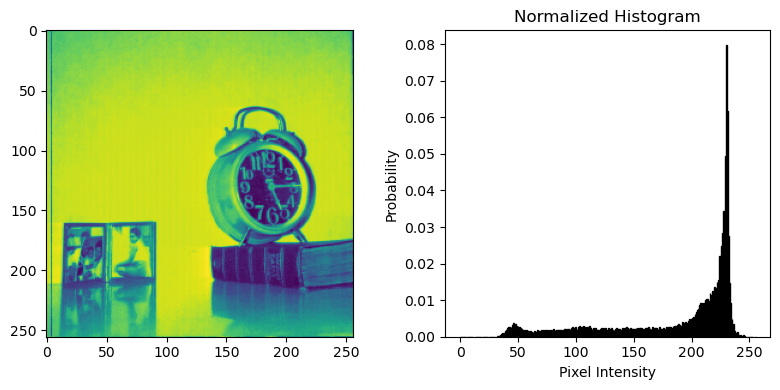

Image Entropy: 1.548313696653812


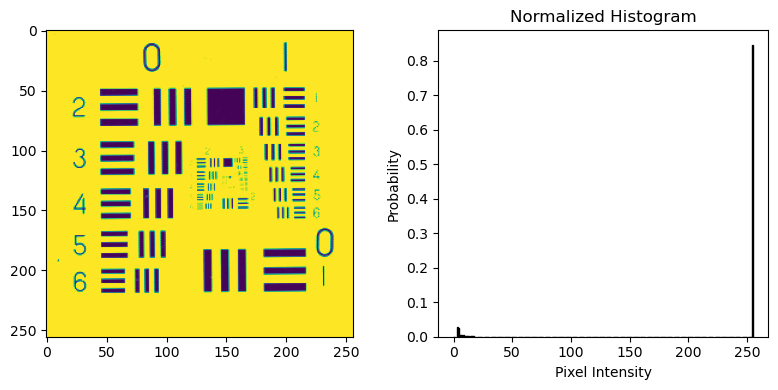

In [20]:
image_paths = ['5.1.09.tiff','5.1.11.tiff','5.1.12.tiff','5.1.13.tiff']
for path in image_paths:
    plot_img(path)

## Question 8

Joint Entropy: 13.675203263382308


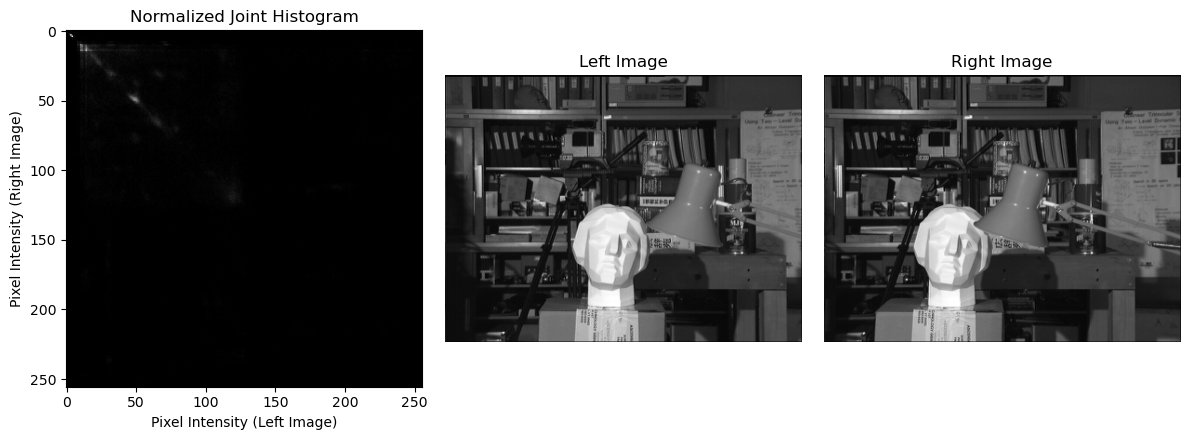

In [22]:
# Function to compute the normalized joint histogram
def compute_normalized_joint_histogram(img1, img2):
    joint_hist, xedges, yedges = np.histogram2d(img1.flatten(), img2.flatten(), bins=[256, 256], range=[[0, 256], [0, 256]])

    joint_hist = joint_hist / joint_hist.sum()

    return joint_hist

# Function to compute joint entropy
def compute_joint_entropy(joint_hist):
    joint_hist = joint_hist[joint_hist > 0]

    entropy = -np.sum(joint_hist * np.log2(joint_hist))

    return entropy


def plot_images(left_image_path,right_image_path):
    left_image = Image.open(left_image_path)
    right_image = Image.open(right_image_path)

    # Convert images to numpy arrays
    left_image_np = np.array(left_image)
    right_image_np = np.array(right_image)

    # Compute the normalized joint histogram
    normalized_joint_hist = compute_normalized_joint_histogram(left_image_np, right_image_np)

    # Compute the joint entropy
    joint_entropy = compute_joint_entropy(normalized_joint_hist)

    print(f'Joint Entropy: {joint_entropy}')

    plt.figure(figsize=(12, 6))

    # Plot the joint histogram
    plt.subplot(1, 3, 1)
    plt.imshow(normalized_joint_hist, cmap='gray')
    plt.title('Normalized Joint Histogram')
    plt.xlabel('Pixel Intensity (Left Image)')
    plt.ylabel('Pixel Intensity (Right Image)')

    # Plot the grayscale images
    plt.subplot(1, 3, 2)
    plt.imshow(left_image_np, cmap='gray')
    plt.title('Left Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(right_image_np, cmap='gray')
    plt.title('Right Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
left_image_path = 'left.png'
right_image_path = 'right.png'
plot_images(left_image_path,right_image_path)

In [23]:
left_image = np.asarray(Image.open(left_image_path))
right_image = np.asarray(Image.open(right_image_path))
normalized_joint_hist = compute_normalized_joint_histogram(left_image, right_image)

joint_entropy = compute_joint_entropy(normalized_joint_hist)
print(f"Test Joint Entropy: {joint_entropy}")

Test Joint Entropy: 13.675203263382308


## Question 9

In [25]:
import numpy as np

def conditional_pmf(joint_pmf, conditioning_var_index, conditioning_value):
    if conditioning_var_index == 0:
        marginal = np.sum(joint_pmf, axis=1)
        if marginal[conditioning_value] > 0:
            conditional_pmf = joint_pmf[conditioning_value, :] / marginal[conditioning_value]
        else:
            conditional_pmf = np.zeros_like(joint_pmf[conditioning_value, :])
    elif conditioning_var_index == 1:
        marginal = np.sum(joint_pmf, axis=0)
        if marginal[conditioning_value] > 0:
            conditional_pmf = joint_pmf[:, conditioning_value] / marginal[conditioning_value]
        else:
            conditional_pmf = np.zeros_like(joint_pmf[:, conditioning_value])
    else:
        raise ValueError("conditioning_var_index must be 0 or 1")

    return conditional_pmf

def conditional_entropy(joint_pmf, conditioning_var_index):
    if conditioning_var_index == 0:  # Condition on X
        marginal = np.sum(joint_pmf, axis=1)
        H = 0
        for x in range(joint_pmf.shape[0]):
            if marginal[x] > 0:
                cond_pmf = conditional_pmf(joint_pmf, conditioning_var_index, x)
                H -= marginal[x] * np.nansum(cond_pmf * np.log2(np.where(cond_pmf > 0, cond_pmf, 1)))
    elif conditioning_var_index == 1:  # Condition on Y
        marginal = np.sum(joint_pmf, axis=0)
        H = 0
        for y in range(joint_pmf.shape[1]):
            if marginal[y] > 0:
                cond_pmf = conditional_pmf(joint_pmf, conditioning_var_index, y)
                H -= marginal[y] * np.nansum(cond_pmf * np.log2(np.where(cond_pmf > 0, cond_pmf, 1)))
    else:
        raise ValueError("conditioning_var_index must be 0 or 1")

    return H

normalized_joint_hist = compute_normalized_joint_histogram(left_image, right_image)
cond_index = 0
H_Y_given_X = conditional_entropy(normalized_joint_hist, cond_index)

print(f"Conditional Entropy H(Y|X) = {H_Y_given_X}")


Conditional Entropy H(Y|X) = 6.416909158632363


## Question 10

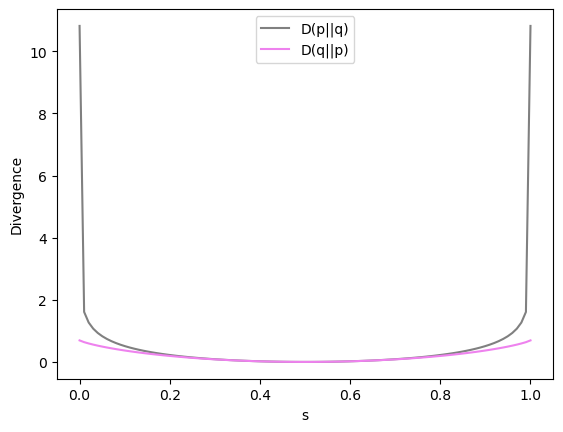

D(p||q): 0.010469305576929294
D(q||p): 0.009988102422862296


In [27]:
def kl_divergence(p, q):
    p = np.array(p)
    q = np.array(q)

    p = np.where(p == 0, 1e-10, p)
    q = np.where(q == 0, 1e-10, q)

    return np.sum(p * np.log(p / q))

def plot_kl_divergence(r, s_values):
    p = [r, 1-r]
    D_pq = []
    D_qp = []

    for s in s_values:
        q = [s, 1-s]
        D_pq.append(kl_divergence(p, q))
        D_qp.append(kl_divergence(q, p))

    plt.plot(s_values, D_pq, label='D(p||q)',color = 'gray')
    plt.plot(s_values, D_qp, label='D(q||p)',color='violet')
    plt.xlabel('s')
    plt.ylabel('Divergence')
    plt.legend()
    plt.show()

r = 0.5
s_values = np.linspace(0, 1, 100)
plot_kl_divergence(r, s_values)


def compute_normalized_histogram(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=(0, 256), density=True)
    return hist

left_image = np.asarray(Image.open('left.png'))
right_image = np.asarray(Image.open('right.png'))

p_hist = compute_normalized_histogram(left_image)
q_hist = compute_normalized_histogram(right_image)

# Compute the KL divergences
D_pq = kl_divergence(p_hist, q_hist)
D_qp = kl_divergence(q_hist, p_hist)

print(f'D(p||q): {D_pq}')
print(f'D(q||p): {D_qp}')



---


**(10) b)**

**(ii)** $P$ ~ $Bern(r), q$ ~ $Bern(s)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$=> p(x=0) = r$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$q(x=0) = s$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$p(x=1) = 1-r$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$q(x=1) = 1-s$

$D(p||q) = - Σ p(x) log (\frac{p(x)}{q(x)}) = Σ p(x) log (\frac{q(x)}{p(x)})$


**Jensen's Inequality**

$Σ p(x) ϕ(f(x)) >= ϕ(Σ p(x) f(x))$

$ϕ(y) = log(y) $ and $y = (\frac{q(x)}{p(x)})$

$Σ p(x) log (\frac{q(x)}{p(x)}) >= log (Σ p(x)\cdot  (\frac{q(x)}{p(x)}))= 0$

---

**(iii)**

$D(p||q) = 0$  when  $(\frac{q(x)}{p(x)} = 1)$

$D(p||q) = Σ p(x) log (\frac{q(x)}{p(x)})$

$D(q||p) = Σ q(x) log (\frac{p(x)}{q(x)})$
$D(p||q) = r *log (\frac{s}{r} )+ (1-r)*log (\frac{1-s}{1-r})$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$= r *log (\frac{s(1-r)}{r(1-s)}) + log (\frac{1-s}{1-r})$

$D(q||p) = s *log (\frac{r}{s}) + (1-s) *log (\frac{1-r}{1-s})$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$= s *log (\frac{r(1-s)}{s(1-r)}) + log (\frac{1-r}{1-s})$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$= -s *log (\frac{s(1-r)}{r(1-s)}) - log (\frac{1-s}{1-r})$

$D(p||q) + D(q||p) = (r-s) *log (\frac{s(1-r)}{r(1-s)})$

When r = s

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$D(p||q) = D(q||p) = 0$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$D(p||q) + D(q||p)\geq 0$

$ ∵ D(p||q)\geq 0$ and $D(q||p)\geq 0 $

**(iv)**

KL divergence is an informative measure of the difference between two probability distributions. However, due to its asymmetry and sensitivity to small variations (especially in low-probability regions), it might not always be the most reliable metric for image similarity.